In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import matplotlib as mpl 
mpl.rcParams['axes.unicode_minus']=False
# 确保中文显示正常
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
# from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("/Users/dear/Desktop/Pythagoras/data.csv")
startpoint=2
endpoint=startpoint+200000
data= data[startpoint : endpoint]
data['roll mean 3000'] = data['bid_price_bitmex'].rolling(2900).mean()
data ['trend'] = data['roll mean 3000'].diff()
data ['trend roll'] = data ['trend'].diff().rolling(20).mean()
data ['trend long roll'] = data['trend'].diff().rolling(2900).mean()
#通过斜率确定短期趋势下行，make 空单，提前计算信号，节省循环时间
#data['signal -1'] = np.where((data['ask_price_bitmex'] > data['ask_price_bitmex'].shift(1)) & (data['trend'].shift(10) <-0.00001)&(data['trend roll'].shift(3) > data['trend roll'].shift(1)),-1,0)
data['signal -1'] = np.where((data['ask_price_bitmex'] < data['ask_price_bitmex'].shift(1))&(data['trend long roll'].shift(2) > data['trend long roll'].shift(1)) & (data['trend roll'].shift(1)>-0.0003)& (data['trend roll'].shift(1)<0.00000),-1,0)#take
#通过斜率确定短期趋势上行，make 多单
#data['signal +1'] = np.where((data['bid_price_bitmex'] < data['bid_price_bitmex'].shift(1)) & (data['trend roll'].shift(10) >0.00002)&(data['trend roll'].shift(3) <data['trend roll'].shift(1)),1,0)
data['signal +1'] = np.where((data['bid_price_bitmex'] > data['bid_price_bitmex'].shift(1))&(data['trend long roll'].shift(2) < data['trend long roll'].shift(1))& (data['trend roll'].shift(1)<0.0002)& (data['trend roll'].shift(1)>-0.00000),1,0)#take
#data['signal -1'] = np.where((data['ask_price_bitmex'] > data['ask_price_bitmex'].shift(1)),-1,0)
#data['signal +1'] = np.where((data['bid_price_bitmex'] < data['bid_price_bitmex'].shift(1)),1,0)
data['signal'] = data['signal -1'] + data['signal +1']

data['buy loc'] = data['signal +1']*data['bid_price_bitmex']
data['buy loc'].replace(0, np.nan, inplace=True)
data['sell loc'] = abs(data['signal -1'])*data['ask_price_bitmex']
data['sell loc'].replace(0, np.nan, inplace=True)
data = data[6000:]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


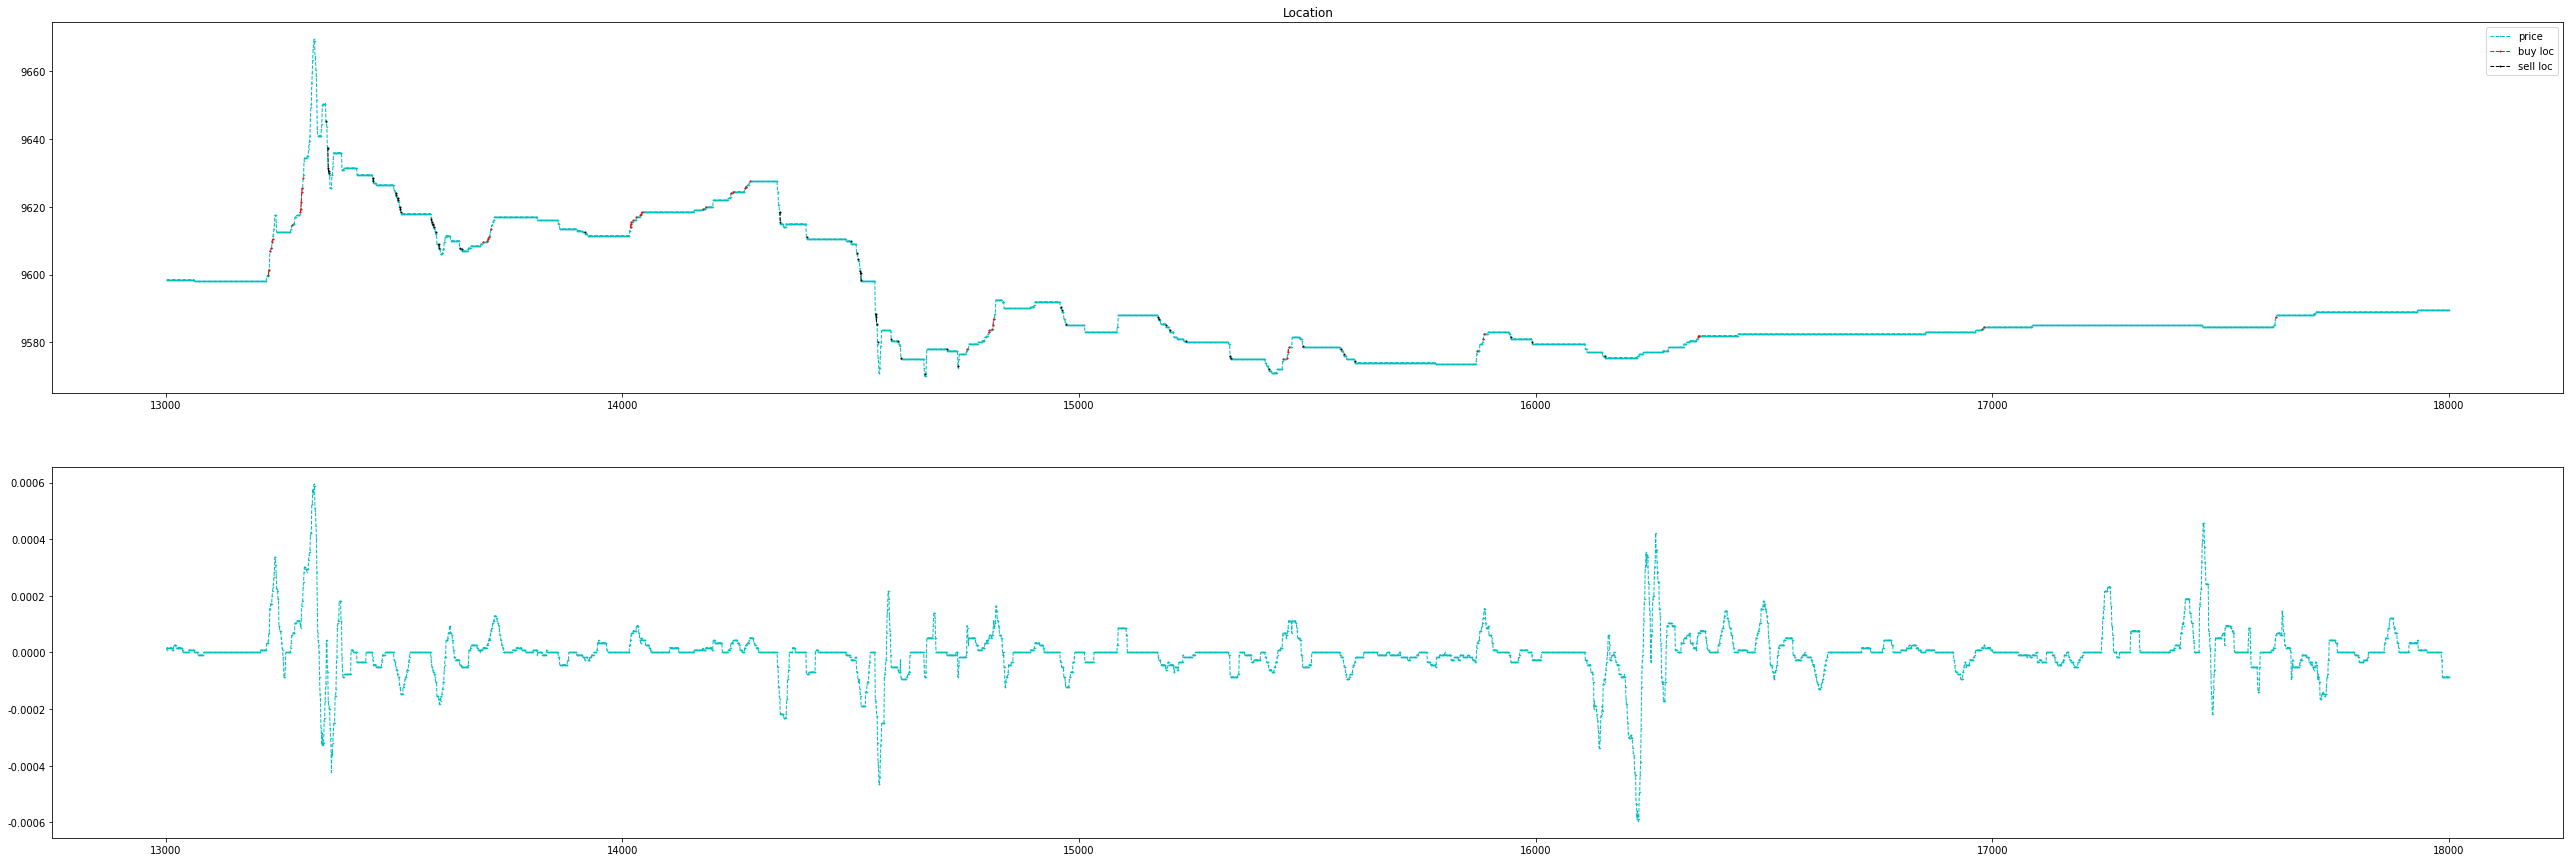

In [3]:
# data['pl'] = abs(data['signal -1'] * data['bid_price_bitmex']*0.99925) - (data['signal +1']*data['ask_price_bitmex']*1.00075)
N = 7000
M = 5000
fig = plt.figure(figsize = (45,15))
plt.subplot(2, 1, 1)
plt.plot(data['bid_price_bitmex'][N:N+M],color='c', marker='.', linestyle='dashed',linewidth=1,markersize=1,label = 'price')
plt.plot(data['buy loc'][N:N+M], color='red', marker='o', linestyle='dashed',linewidth=1,markersize=1,label = 'buy loc')
plt.plot(data['sell loc'][N:N+M], color='k', marker='o', linestyle='dashed',linewidth=1,markersize=1,label = 'sell loc')
plt.title('Location')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data['trend roll'][N:N+M],color='c', marker='.', linestyle='dashed',linewidth=1,markersize=1,label = 'close_profit')

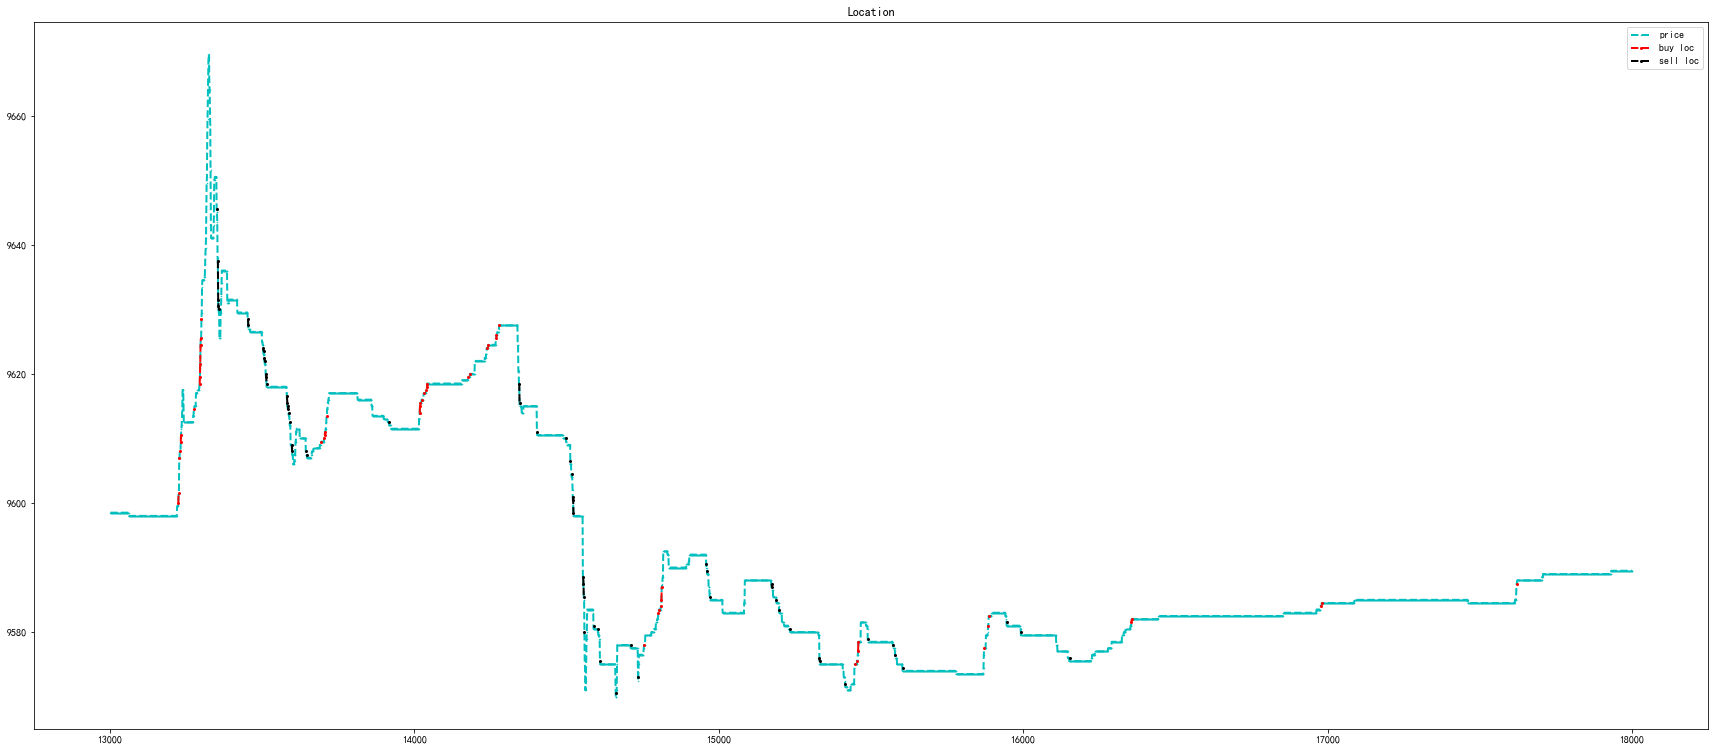

In [59]:
fig = plt.figure(figsize = (30,13))
plt.plot(data['bid_price_bitmex'][N:N+M],color='c', marker='.', linestyle='dashed',linewidth=2, markersize=1,label = 'price')
plt.plot(data['buy loc'][N:N+M], color='red', marker='o', linestyle='dashed',linewidth=2, markersize=2,label = 'buy loc')
plt.plot(data['sell loc'][N:N+M], color='k', marker='o', linestyle='dashed',linewidth=2, markersize=2,label = 'sell loc')
plt.title('Location')
plt.legend()

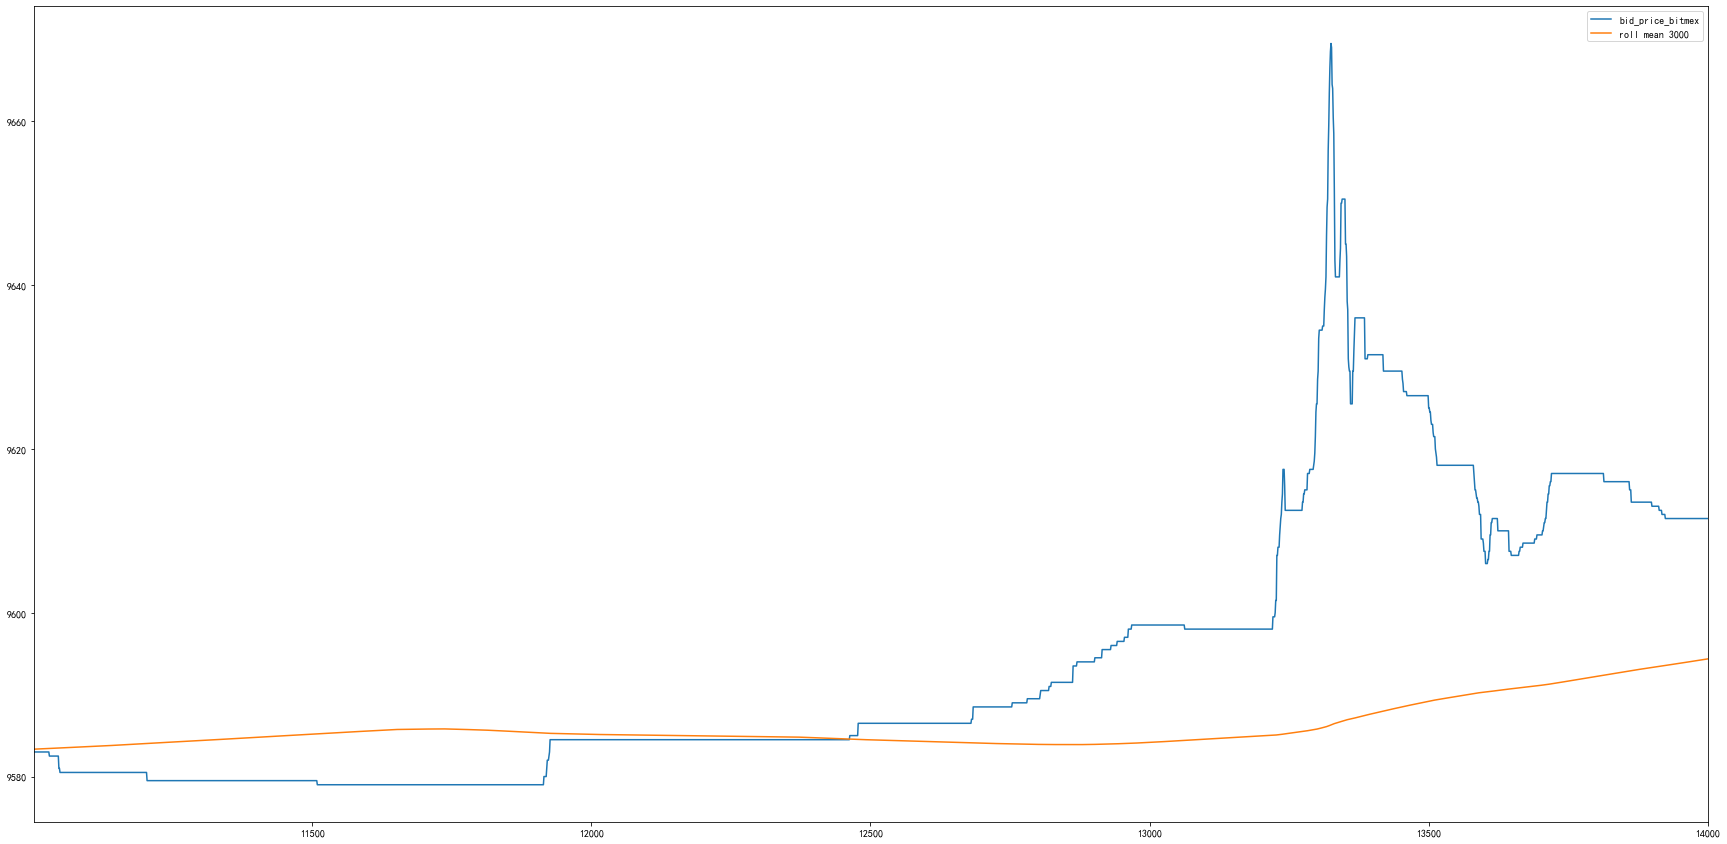

In [25]:
data[['bid_price_bitmex','roll mean 3000']][N:N+M].plot(figsize = (30,15)) 

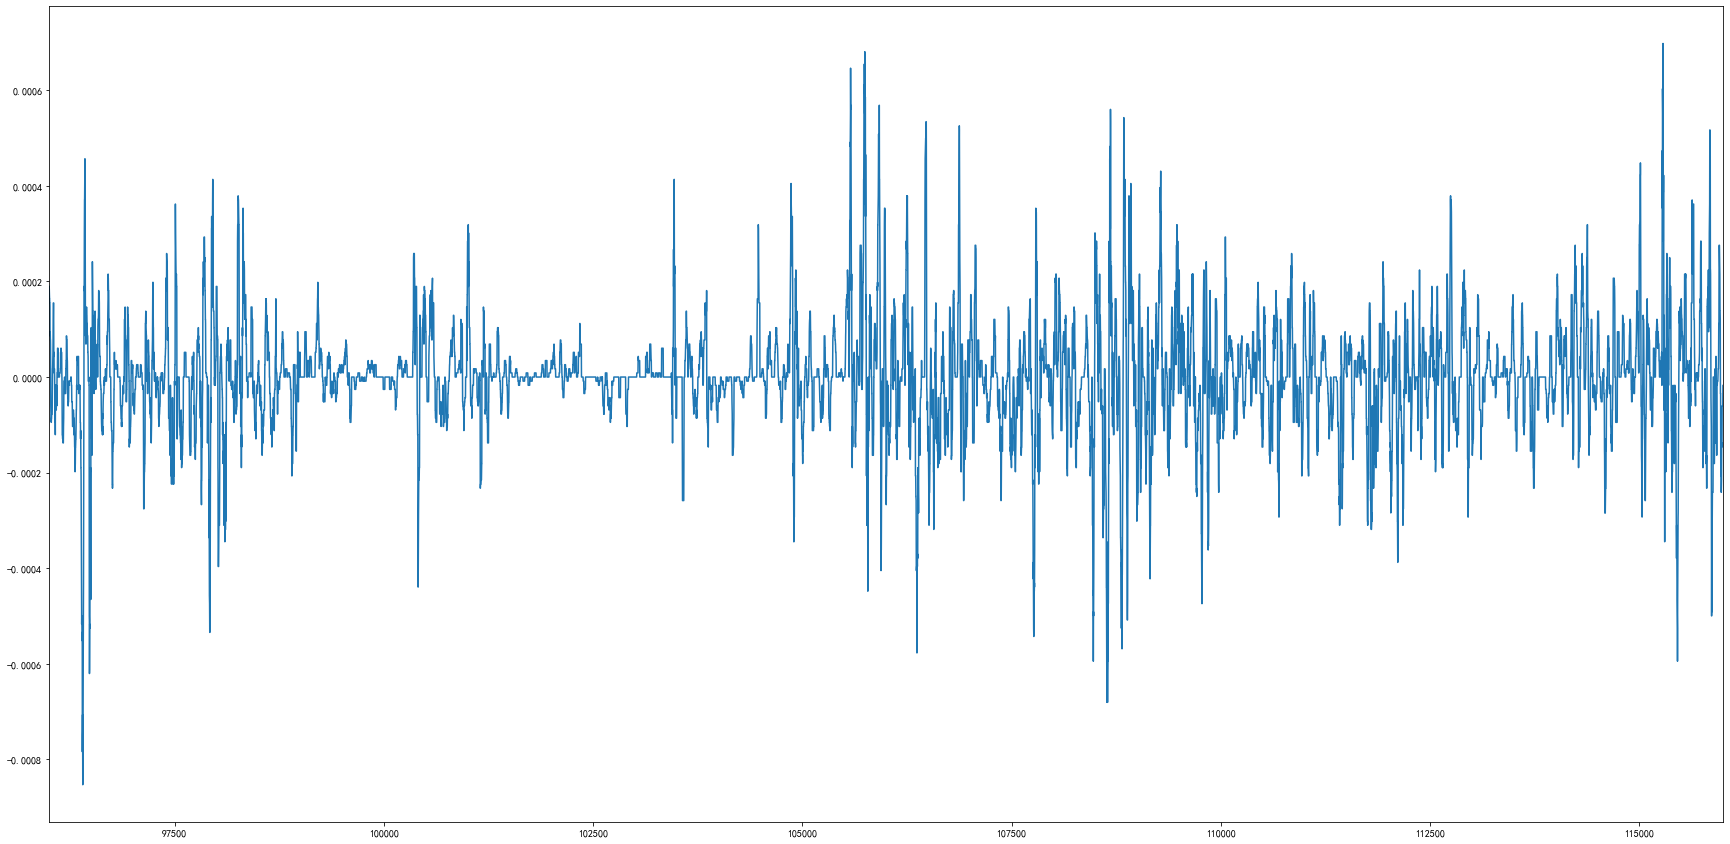

In [15]:
data['trend roll'][N:N+M].plot(figsize = (30,15)) 

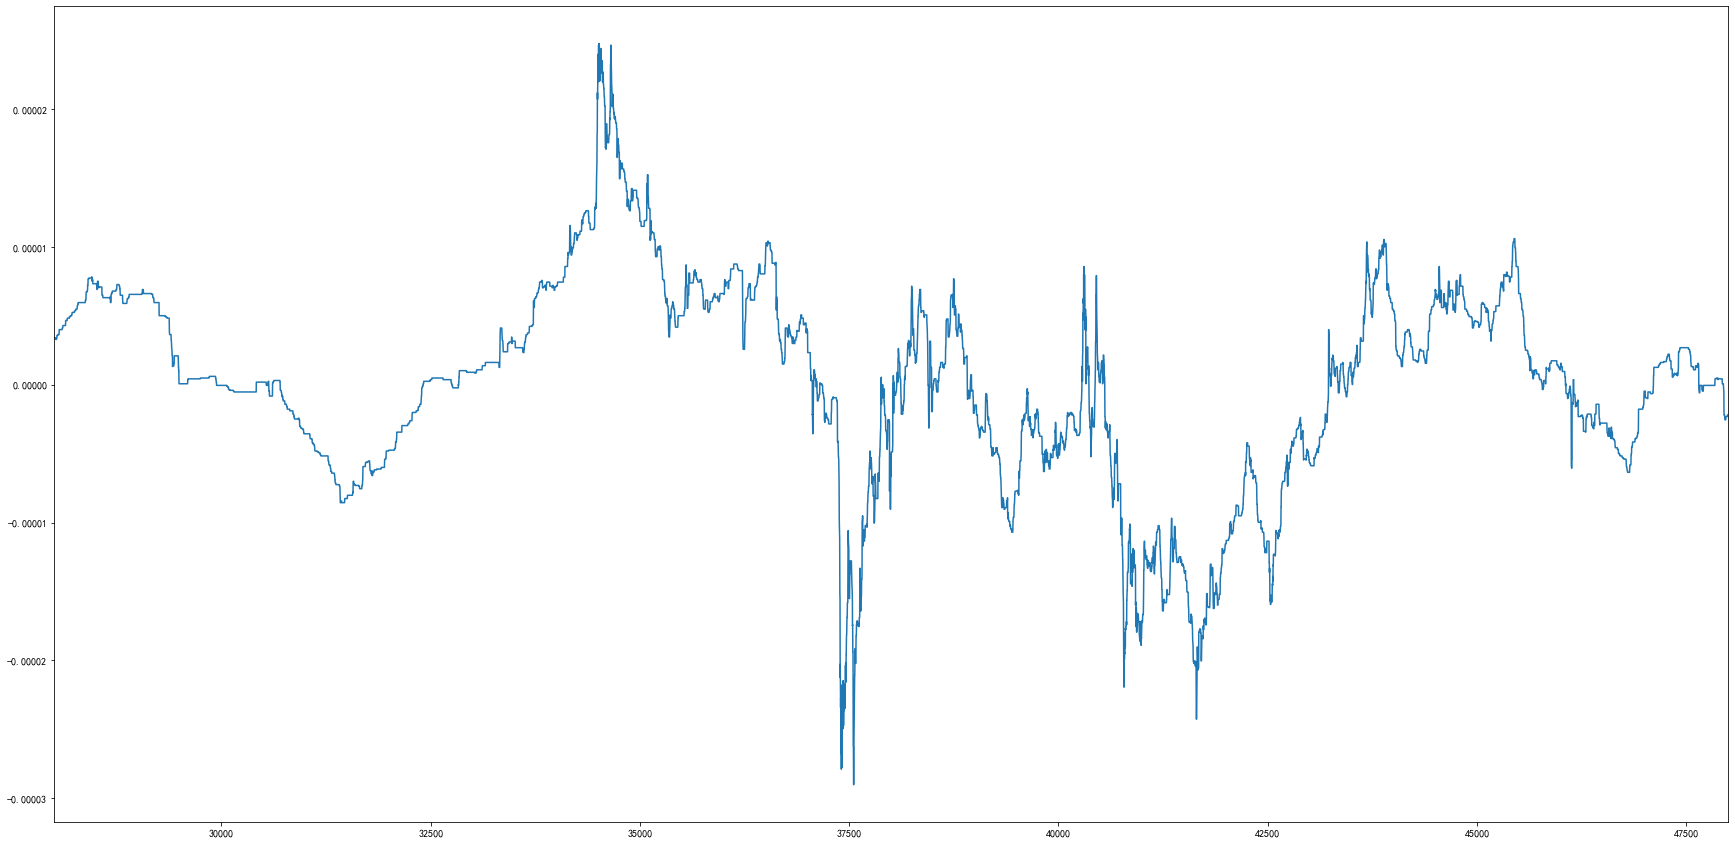

In [50]:
data['trend long roll'][N:N+M].plot(figsize = (30,15)) 

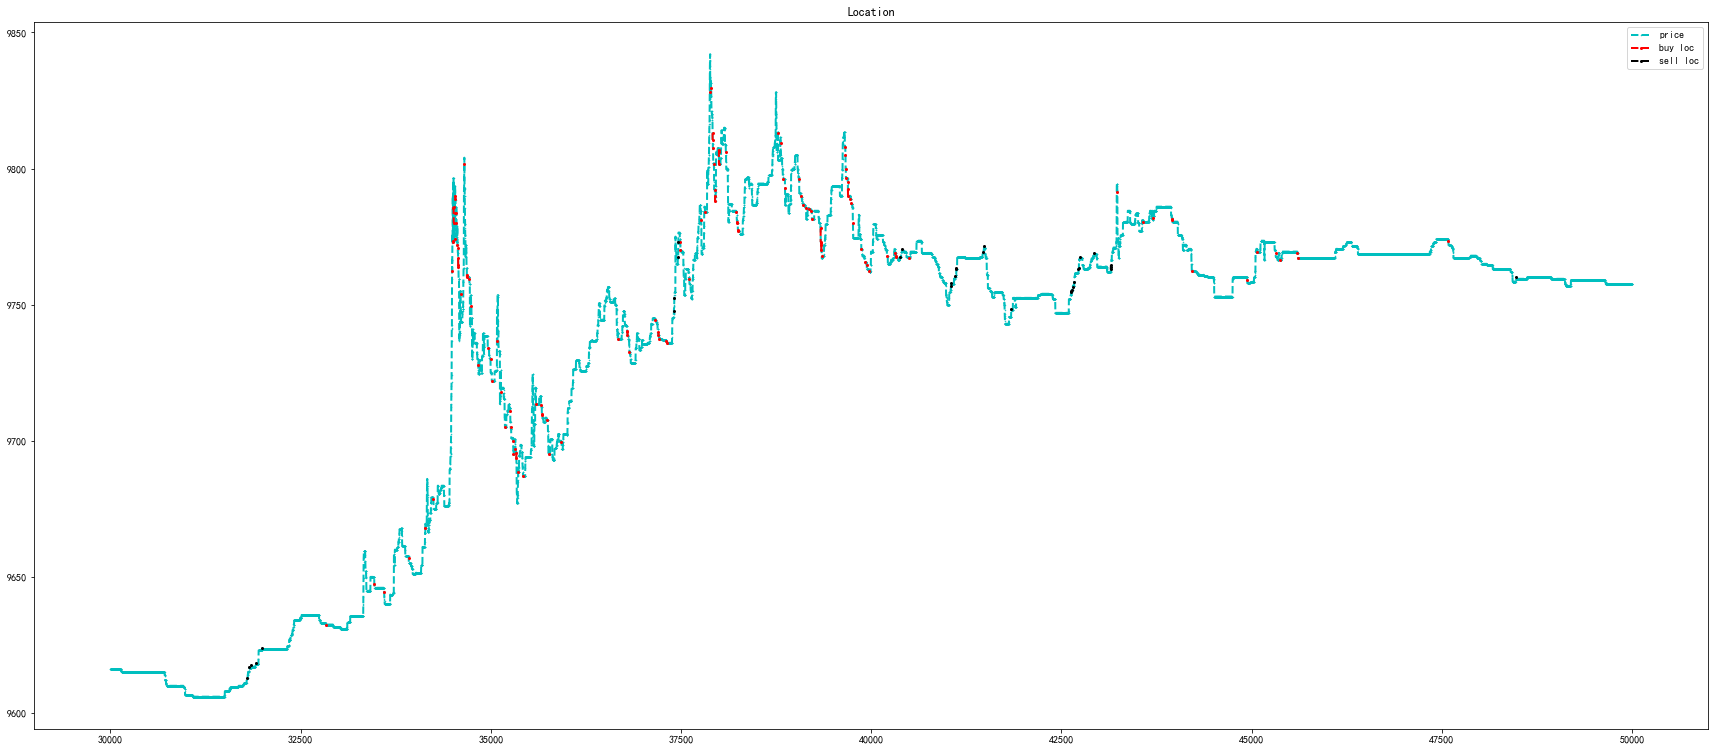

In [12]:
fig = plt.figure(figsize = (30,13))
plt.plot(data['bid_price_bitmex'][N:N+M],color='c', marker='.', linestyle='dashed',linewidth=2, markersize=1,label = 'price')
plt.plot(data['buy loc'][N:N+M], color='red', marker='o', linestyle='dashed',linewidth=2, markersize=2,label = 'buy loc')
plt.plot(data['sell loc'][N:N+M], color='k', marker='o', linestyle='dashed',linewidth=2, markersize=2,label = 'sell loc')
plt.title('Location')
plt.legend()

In [15]:
R = 50000
N = 100000
data ['trend'] = data['bid_price_bitmex'].diff().rolling(R).mean()
data['trend4'] = data['bid_price_bitmex'].diff().rolling(10000).mean()
data['roll mean 3000'] = data['bid_price_bitmex'].rolling(3000).mean()
data['roll mean 500'] = data['bid_price_bitmex'].rolling(300).mean()
data['roll mean 20000'] = data['bid_price_bitmex'].rolling(50000).mean()

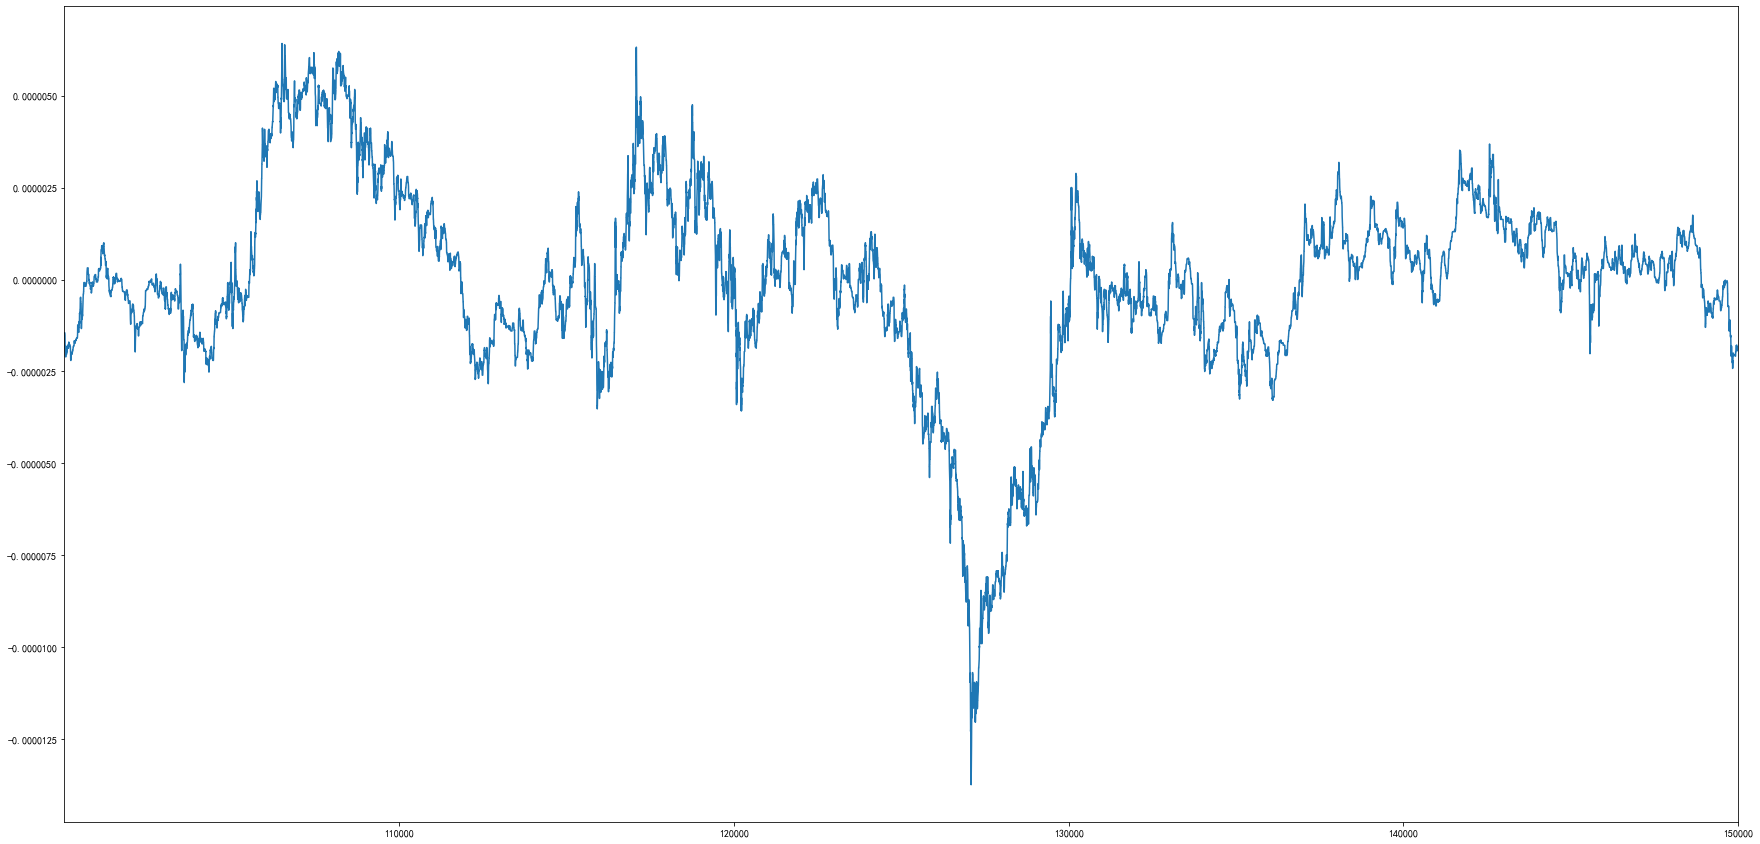

In [4]:
data['trend4 trend'] =data['trend4'].diff().rolling(3000).mean()
data['trend4 trend'][N:N+50000].plot(figsize = (30,15)) 

In [25]:
data['0.004'] = 0.01
data['-0.004'] = -0.01
data['0'] = 0

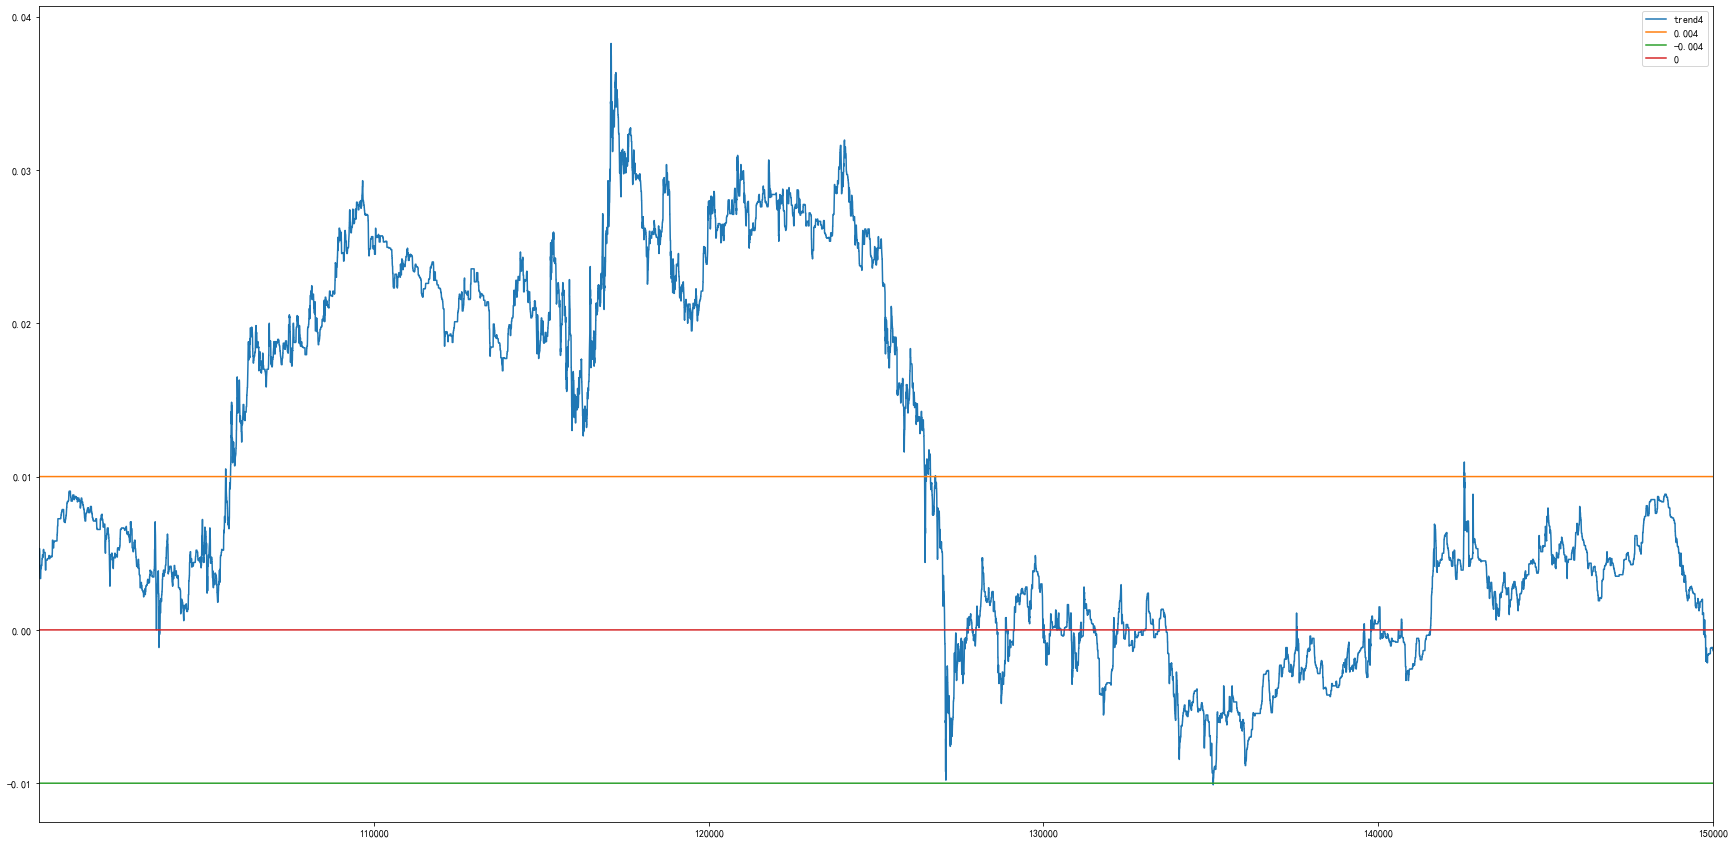

In [8]:
N = 100000
data[['trend4','0.004','-0.004','0']][N:N+50000].plot(figsize = (30,15)) 

In [19]:
N=650000

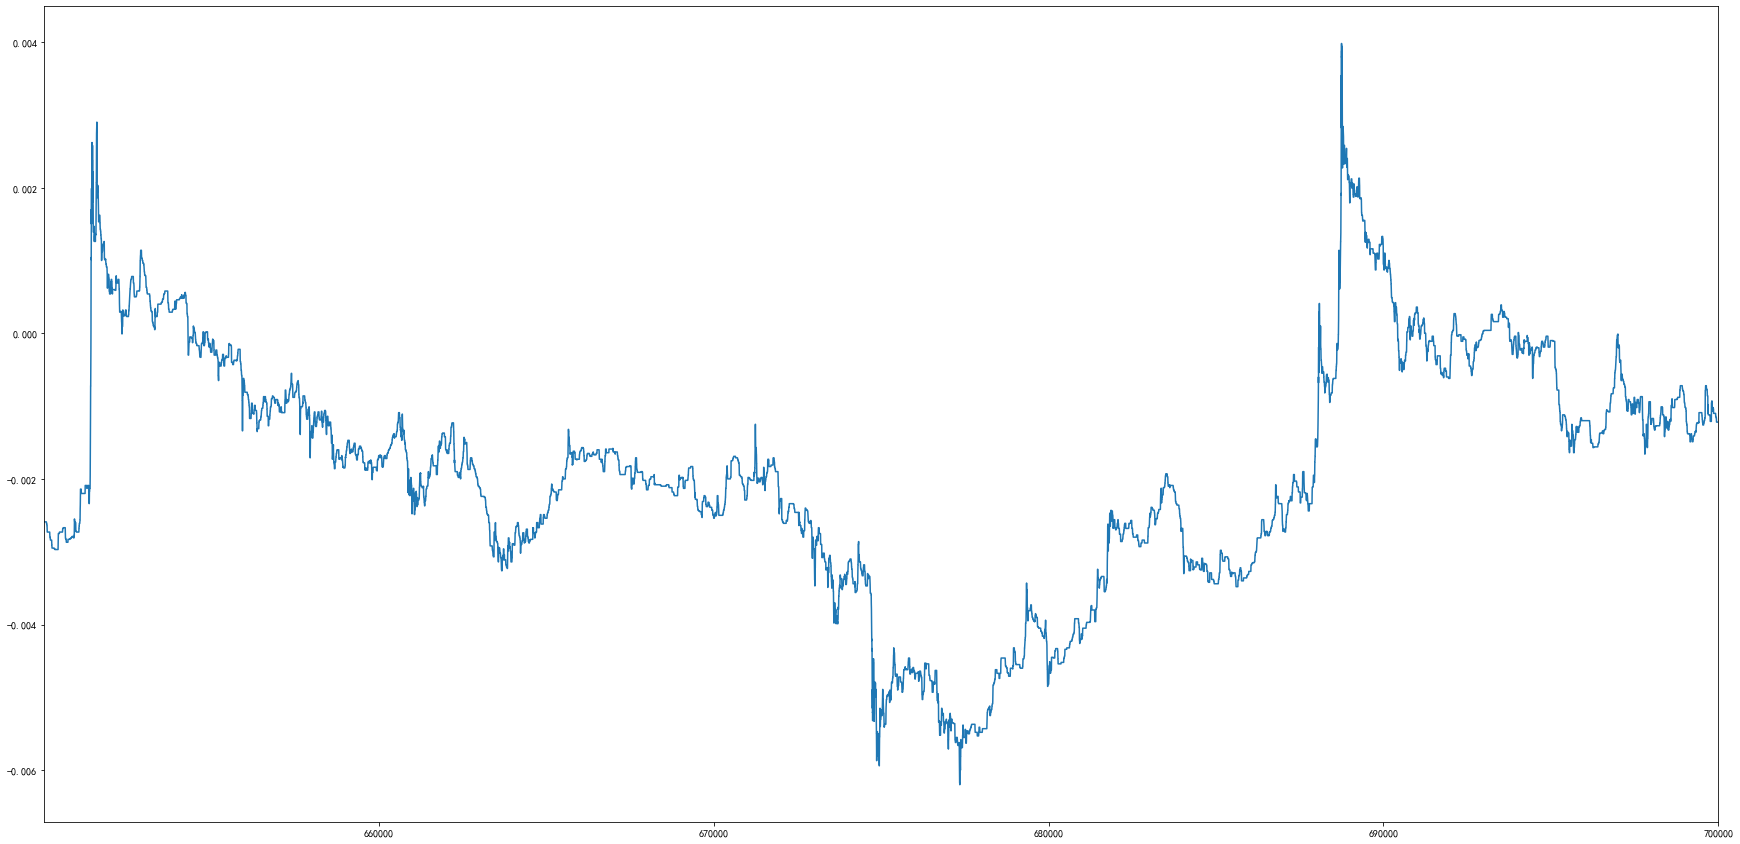

In [20]:
data['trend'][N:N+50000].plot(figsize = (30,15)) 

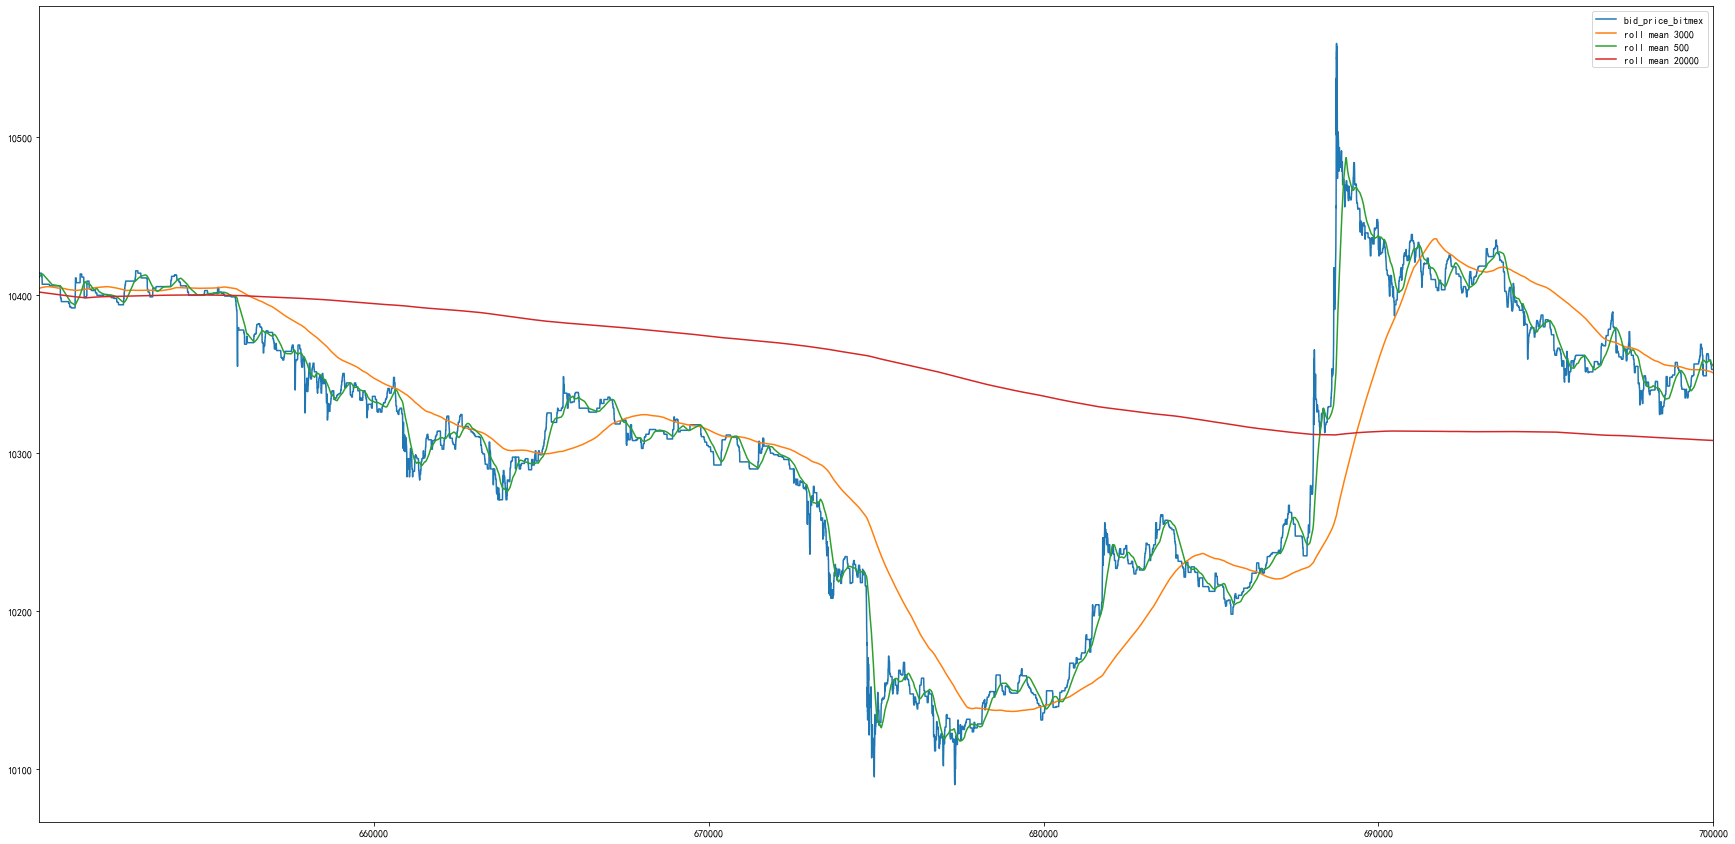

In [21]:
data[['bid_price_bitmex','roll mean 3000','roll mean 500','roll mean 20000']][N:N+50000].plot(figsize = (30,15)) 

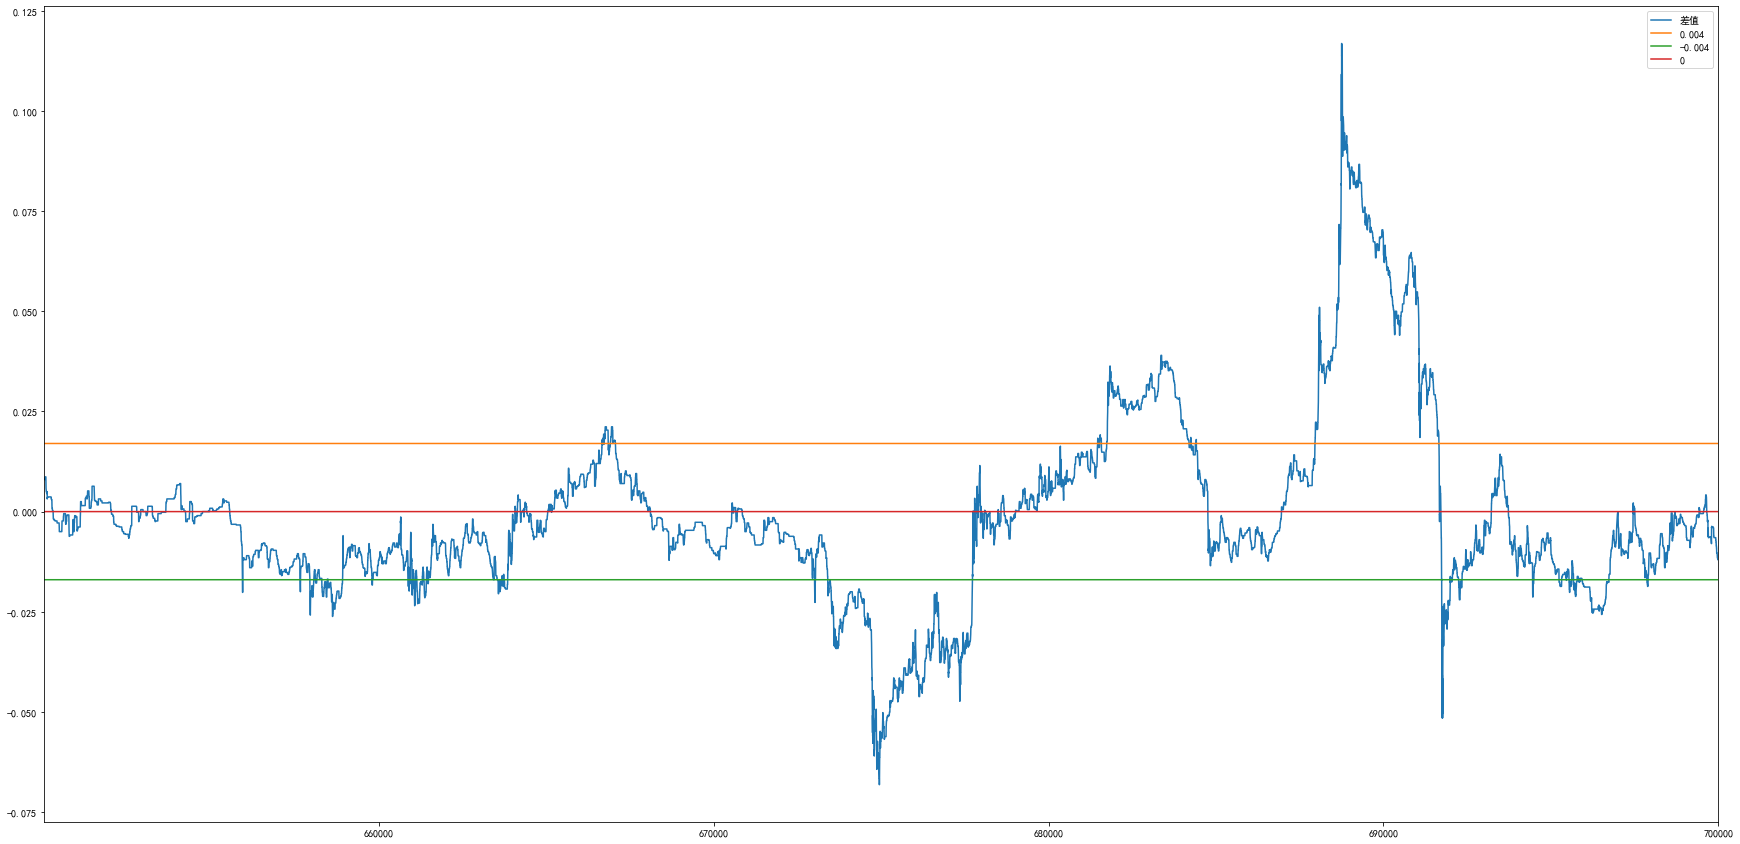

In [28]:
data['0.004'] = 0.017
data['-0.004'] = -0.017
data['0'] = 0
data ['差值'] = data['roll mean 3000'].diff()
data[['差值','0.004','-0.004','0']][N:N+50000].plot(figsize = (30,15)) 

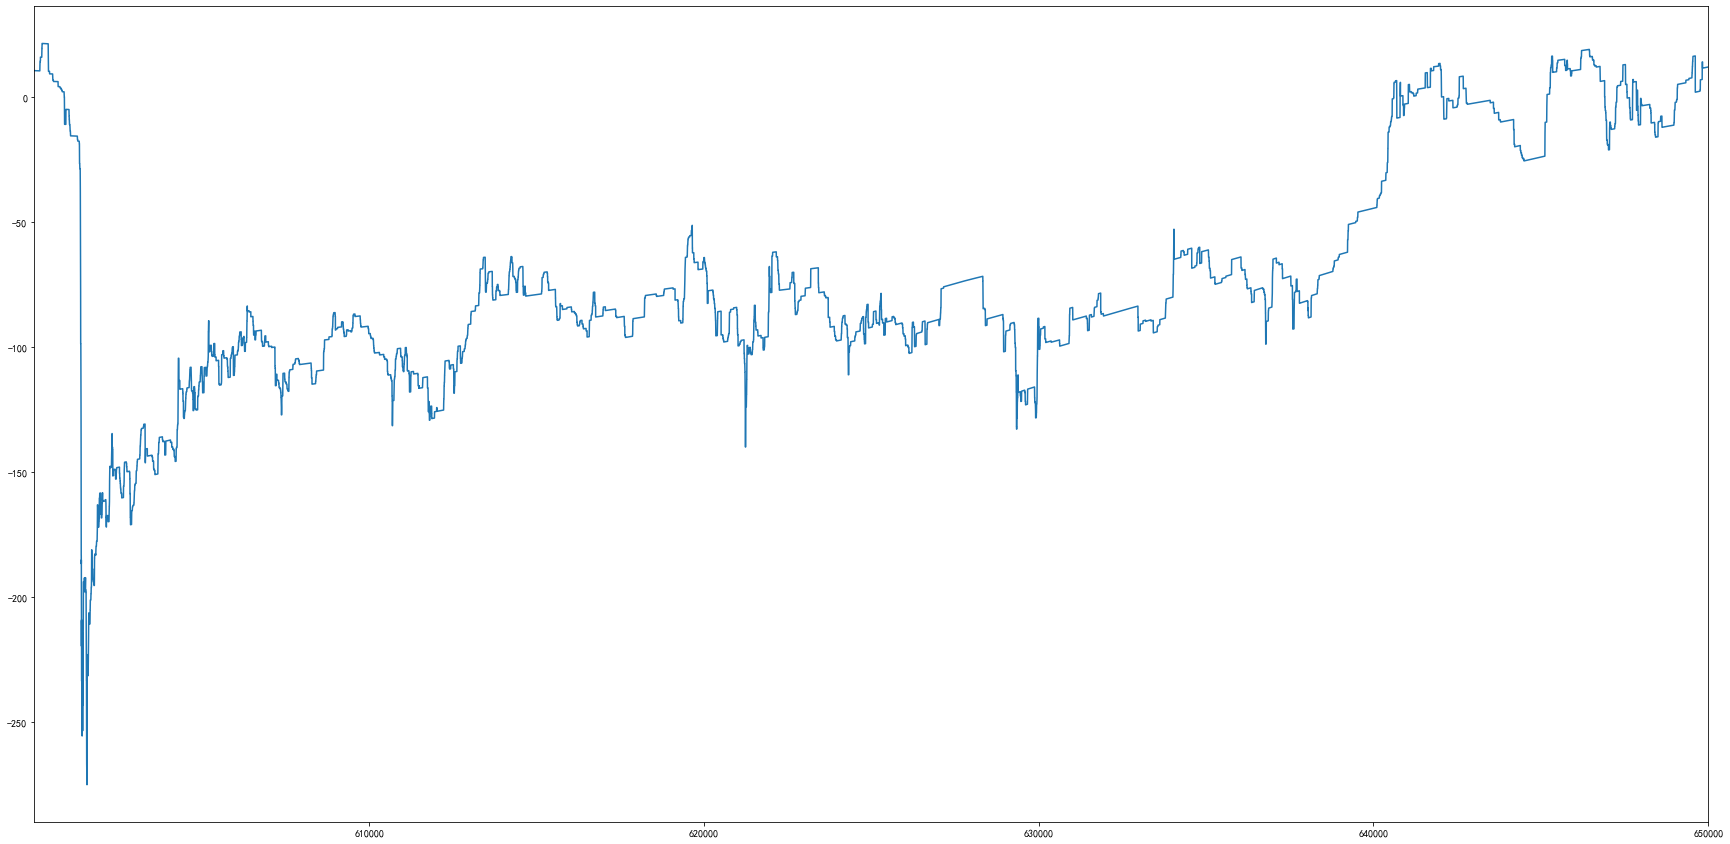

In [14]:
data['distance'] = data['bid_price_bitmex'] - data['roll mean 20000']
data['distance'][N:N+50000].plot(figsize = (30,15)) 

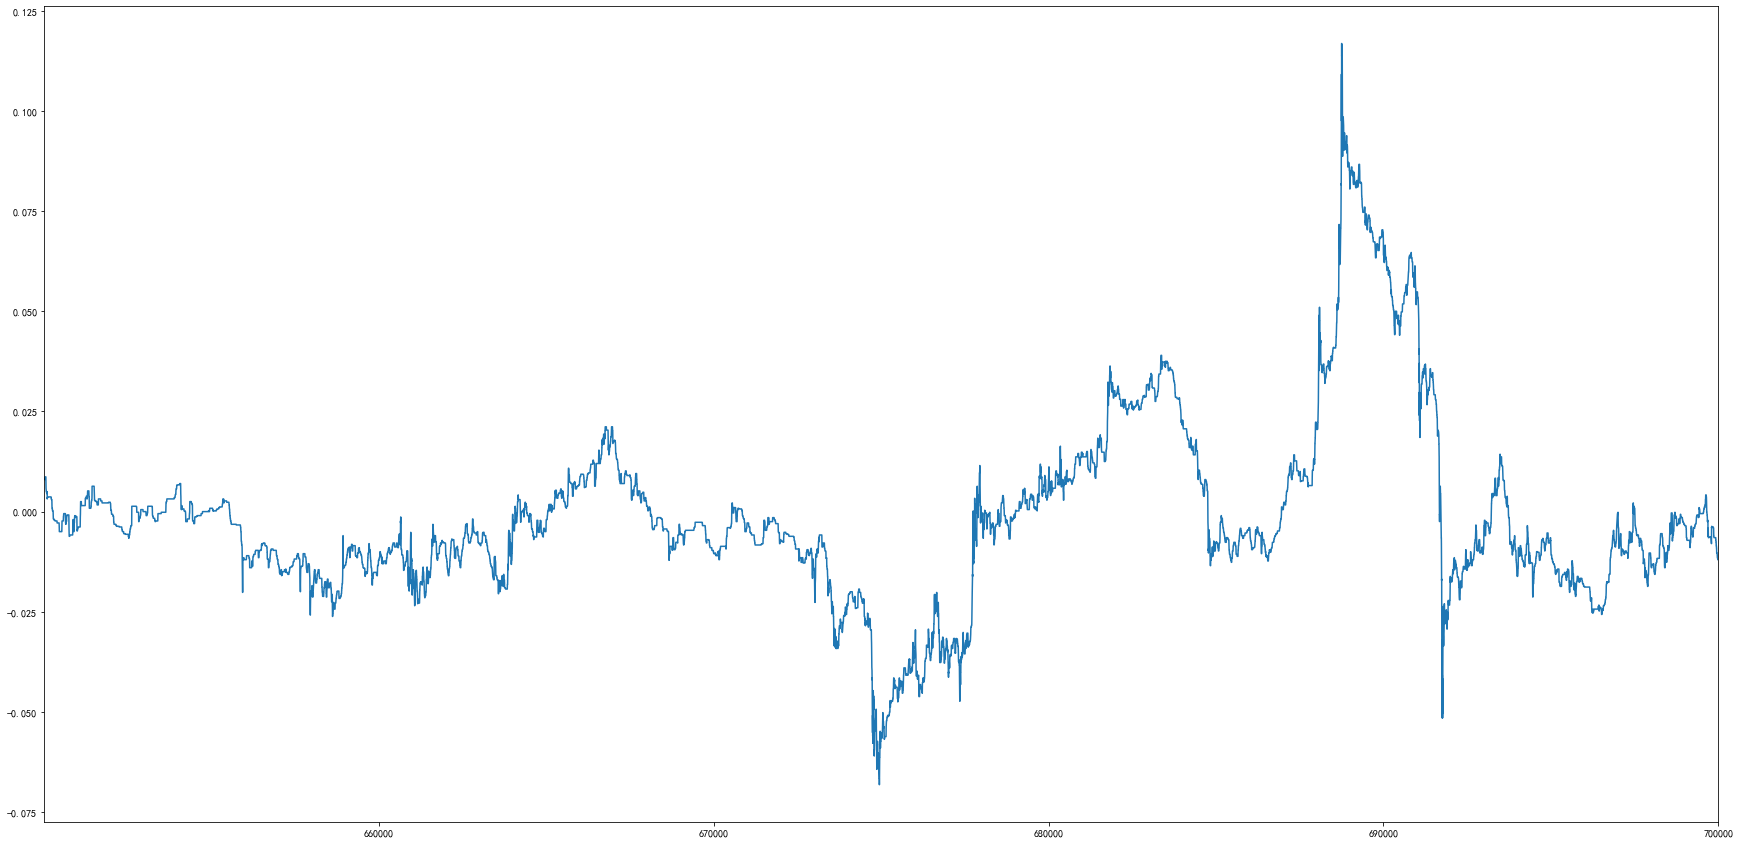

In [22]:
data ['差值'] = data['roll mean 3000'].diff()
data ['差值'][N:N+50000].plot(figsize = (30,15)) 